# Multivariate OLS Regression
- Key Tasks:
    - Regressors
    - Run Regression and Evaluate Results
    - Conclusion

- Regressors:
    - For each categorical variable, create dummy variables that are suitable for use in an OLS Regression, Note that you will need to be careful to avoid multicolinearity
    - Given the availabe regressors, explain whether or not you would keep all of the categorical variables you identified above. Why or why not?

- Run regressions and evaluate results:
    - Using the two regressors that were added (time on the job, year of birth), run a multiviariate regression. Be sure to run a model that includes all possible (or a large number regressors).
    - Based on your regressions, determine which regressors are significate. Why?
    - Indicate which regressors are worth keeping and explain why.
    - Rerun the regression wtih the reduced complexity model.
    - Inspect the residuals and determine whether or not they are normally distributed. Be sure to provide rationale for your determination.
    - Compare the results of your regression to the results of the univariate regression you previously performed. If there is an improvement in the key metrics, is the increased complexity justified? Which metric would you use to justify this?

- Conclusions:
    - If you had unlimited programming skills, determine the additional regressors that you would create from the availabe data why?
    - Describe how your interpretations of the regression can help inform business decisions.

# Project

### Importing Packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading Dataset

In [5]:
df = pd.read_csv('roster_with_score_2-1.csv')
df.head()

,Unnamed: 0,Unnamed: 0_x,employee_id,title,last,first,manager_id,function,department,location,...,seniority,alignment,development,enablement,engagement,leadership,overall,Unnamed: 0_y,year_of_birth,time_on_the_job
0,0,0,343,CEO,Duran,Veronica,0.0,CEO,Leadership,"Mountain View, CA",...,4,0.800000,0.666667,0.733333,0.68,0.733333,0.722667,0,1978,22.885246
1,1,1,203,Administrative Assistant,Thompson,Anne,343.0,CEO,Leadership,"Mountain View, CA",...,0,0.800000,0.933333,0.933333,0.80,0.866667,0.866667,1,1976,37.967213
2,2,2,11,VP Engineering,Xiong,Steven,343.0,CEO,Engineering,"Mountain View, CA",...,3,0.933333,0.866667,1.000000,0.84,1.000000,0.928000,2,1983,70.360656
3,3,3,707,Administrative Assistant,Sanchez,Carolyn,11.0,CEO,Engineering,"Mountain View, CA",...,0,0.733333,0.800000,0.666667,0.76,0.466667,0.685333,3,1970,4.163934
4,4,4,417,Chief Technology Officer,Deleon,Amanda,343.0,CEO,Advanced Technology,"Mountain View, CA",...,2,0.933333,0.533333,0.733333,0.80,0.866667,0.773333,4,1977,19.540984


### Information about Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Unnamed: 0_x       381 non-null    int64  
 2   employee_id        381 non-null    int64  
 3   title              381 non-null    object 
 4   last               381 non-null    object 
 5   first              381 non-null    object 
 6   manager_id         381 non-null    float64
 7   function           381 non-null    object 
 8   department         381 non-null    object 
 9   location           381 non-null    object 
 10  age                381 non-null    object 
 11  sex                381 non-null    object 
 12  ethnicity          381 non-null    object 
 13  employment_status  381 non-null    object 
 14  tenure             381 non-null    object 
 15  tenure_id          381 non-null    int64  
 16  seniority          381 non

## Regressor

### For each categorical variable, create dummy variables that are suitable for use in an OLS Regression, Note that you will need to be careful to avoid multicolinearity

- Column names of Categorical Variables

In [7]:
print(df.select_dtypes('object').columns)

Index(['title', 'last', 'first', 'function', 'department', 'location', 'age',
       'sex', 'ethnicity', 'employment_status', 'tenure'],
      dtype='object')


- Checking for the N-Unique Valuse in Dataset (Categorical Variables)

In [8]:
df.select_dtypes('object').nunique()

title                 59
last                 223
first                265
function               8
department            36
location               5
age                    6
sex                    2
ethnicity              5
employment_status      2
tenure                 5
dtype: int64

- Value count in categorical variable

In [9]:
df.select_dtypes("object").value_counts()

title                   last        first    function         department         location           age      sex  ethnicity         employment_status  tenure                
Accountant              Bell        Chad     Loan Operations  Finance            Mountain View, CA  35 - 44  M    white             Part time          4 to less than 6 years    1
Manager of Engineering  Wilson      Gabriel  Engineering      Front End          Mountain View, CA  35 - 44  M    white             Full time          less than 6 months        1
Marketing Analyst       Jones       James    Finance & Admin  Marketing          New York, NY       18 - 24  M    white             Full time          less than 6 months        1
                        Cunningham  Lindsay  Finance & Admin  Marketing          New York, NY       35 - 44  F    white             Full time          2 to less than 4 years    1
                        Boyd        Mary     Finance & Admin  Channel Marketing  New York, NY       25 - 34  F

- Dropping Categorical Variables with Hard cardinality

In [10]:
df = df.drop(['first','last','Unnamed: 0',"Unnamed: 0_x",'Unnamed: 0_y','employee_id'],axis=1)

- Only keeping those categorical variables which are mentioned in assignment

In [11]:
categorical_variables = ['department','location','age',"sex",'employment_status','tenure']
print(df[categorical_variables].shape)
print(df.shape)

(381, 6)
(381, 20)


- Encoding Categorical Variables

In [12]:
df_dummies = pd.get_dummies(df[categorical_variables])
df = df.drop(categorical_variables,axis=1)
df = pd.concat([df,df_dummies],axis=1)

- Dropping other categorical variables: By dropping and encoding categorical attribues, now we have only numeric variables.
- `NOTE:` Only those categorical variables have kept which are shown in assignment description.

In [13]:
other_categorical = df.select_dtypes('object').columns
df = df.drop(other_categorical,axis=1)

- Checking for the multicollinearity

In [14]:
columns_for_vif = df.columns
vif_data = pd.DataFrame()
vif_data['variable'] = columns_for_vif
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [15]:
for i in vif_data.values:
    print(i)

['manager_id' 1.5915796355481533]
['tenure_id' inf]
['seniority' 1.419402130657405]
['alignment' inf]
['development' inf]
['enablement' inf]
['engagement' inf]
['leadership' inf]
['overall' inf]
['year_of_birth' 18.046428952435146]
['time_on_the_job' 16.453571868692894]
['department_Advanced Technology' inf]
['department_Algorithm Development' inf]
['department_Back End' inf]
['department_Channel Marketing' inf]
['department_Compliance' inf]
['department_East Coast Lender Relations' inf]
['department_East Coast Lending' inf]
['department_Engineering' inf]
['department_FHA Loans' inf]
['department_Finance' inf]
['department_Finance & Admin' inf]
['department_Financial Planning & Analysis' inf]
['department_Front End' inf]
['department_Full Stack' inf]
['department_Human Resources' inf]
['department_Leadership' inf]
['department_Lender Portal' inf]
['department_Loan Officer Portal' inf]
['department_Loan Operations' inf]
['department_Marketing' inf]
['department_Midwest Lender Relations'

- Dropping features with high multicollinearity

In [16]:
keeping_features = [
    'manager_id', 'tenure_id', 'seniority', 'alignment', 'development',
    'enablement', 'engagement', 'leadership', 'overall', 'year_of_birth',
    'time_on_the_job', 'department_Advanced Technology', 'department_Algorithm Development',
    'department_Back End', 'department_Channel Marketing', 'department_Compliance',
    'location_Atlanta, GA', 'location_Austin, TX', 'location_Chicago, IL',
    'age_18 - 24', 'age_25 - 34', 'age_35 - 44', 'age_45 - 54', 'sex_F', 'sex_M',
    'employment_status_Full time', 'employment_status_Part time',
    'tenure_1 to less than 2 years', 'tenure_2 to less than 4 years',
    'tenure_4 to less than 6 years'
] 

df_new = df[keeping_features]

### Given the availabe regressors, explain whether or not you would keep all of the categorical variables you identified above. Why or why not?

- Kept attribute for further training of OLS Regression Model

- These attributes have low cardinality, which contributue more, than high cardinality categorical variables (first,last,employee_id) etc. Then we have taken a test of multicollinearity after created dummy variables of categorical variables which are mentioned in assignment. Once we have calculated VIF for each dummy variables, it shows that each variables highly correlated with each other, so we are keeping random features from each dummy variable of each category. Which would be helpful to train our OLS Regression model.

In [17]:
print(df_new.columns) 

Index(['manager_id', 'tenure_id', 'seniority', 'alignment', 'development',
       'enablement', 'engagement', 'leadership', 'overall', 'year_of_birth',
       'time_on_the_job', 'department_Advanced Technology',
       'department_Algorithm Development', 'department_Back End',
       'department_Channel Marketing', 'department_Compliance',
       'location_Atlanta, GA', 'location_Austin, TX', 'location_Chicago, IL',
       'age_18 - 24', 'age_25 - 34', 'age_35 - 44', 'age_45 - 54', 'sex_F',
       'sex_M', 'employment_status_Full time', 'employment_status_Part time',
       'tenure_1 to less than 2 years', 'tenure_2 to less than 4 years',
       'tenure_4 to less than 6 years'],
      dtype='object')


## Run regressions and evaluate results

### Using the two regressors that were added (time on the job, year of birth), run a multiviariate regression. Be sure to run a model that includes all possible (or a large number regressors).

- Splitting Into Features and labels
    - X  : All attiributes 
    - y1 : time_on_the_job
    - y2 : year_of_birth

- We will be applying OLS Regression model on above mentioned variables, For one model we will be using (X,y1) and for second model we will be using (X,y2) to train our OLS Regression for further considerations.

In [18]:
X_features = df_new.drop(['time_on_the_job','year_of_birth'],axis=1)
y1_label = df_new[['time_on_the_job']]
y2_label = df_new[['year_of_birth']]

print(X_features.shape,y1_label.shape,y2_label.shape)

(381, 28) (381, 1) (381, 1)


- Running model for (X,y1_label), where constant will be my X_feature variable and dependent variable will be y1_label (time on the job).

In [19]:
X_const = sm.add_constant(X_features)
model_1 = sm.OLS(y1_label,X_const).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_on_the_job   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          7.33e-192
Time:                        14:20:57   Log-Likelihood:                -1128.9
No. Observations:                 381   AIC:                             2310.
Df Residuals:                     355   BIC:                             2412.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

- Running model for (X,y2_label), where constant will be my X_feature variable and dependent variable will be y1_label (year of the birth).

In [20]:
X_const = sm.add_constant(X_features)
model_2 = sm.OLS(y2_label,X_const).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          year_of_birth   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          3.95e-194
Time:                        14:20:57   Log-Likelihood:                -940.93
No. Observations:                 381   AIC:                             1934.
Df Residuals:                     355   BIC:                             2036.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Based on your regressions, determine which regressors are significant. Why?

- Model 1 Summary:
The OLS regression model for "time_on_the_job" demonstrates statistical significance for key variables, including tenure-related factors (especially "tenure_id" and certain tenure categories), seniority, alignment, development, overall satisfaction, and employment status. Notably, gender ("sex_F" and "sex_M") also plays a significant role in predicting time on the job. However, some variables, such as specific departments, locations, and certain tenure categories, were found to be insignificant in this model. Careful consideration of these significant predictors can provide valuable insights into the factors influencing employees' time on the job.

- Model 2 Summary:
The OLS regression model for "year_of_birth" reveals several statistically significant predictors, including age categories ("age_18 - 24," "age_25 - 34," "age_35 - 44," and "age_45 - 54"), gender ("sex_F" and "sex_M"), and employment status. These variables demonstrate a substantial impact on predicting the birth year of individuals in the dataset. Notably, tenure-related factors, seniority, and various job satisfaction metrics, such as alignment, development, enablement, engagement, leadership, and overall satisfaction, were found to be insignificant in predicting the birth year. The model provides valuable insights into the demographic factors influencing the birth year of individuals in the dataset.

- Model Comparison:

- Model 1 (Dependent Variable: time_on_the_job)
- **R-squared:** 0.933
- **Significant Regressors (p < 0.05):**
  - tenure_id, seniority, alignment, development, overall, sex_F, sex_M, employment_status_Full time, employment_status_Part time, tenure_2 to less than 4 years, tenure_4 to less than 6 years.
- **Insignificant Regressors (p >= 0.05):**
  - Several variables, including specific departments, locations, and certain tenure categories.

- Model 2 (Dependent Variable: year_of_birth)
- **R-squared:** 0.935
- **Significant Regressors (p < 0.05):**
  - age_18 - 24, age_25 - 34, age_35 - 44, age_45 - 54, sex_F, sex_M, employment_status_Full time, employment_status_Part time.
- **Insignificant Regressors (p >= 0.05):**
  - Several variables, including specific departments, locations, and certain tenure categories.

- Comparison:
1. **Common Significant Regressors:** Both models share the significance of gender and employment status in predicting the respective dependent variables.
2. **Model Performance:** Both models exhibit high R-squared values, indicating a strong fit. However, the specific variables contributing to the fit differ due to the nature of the dependent variables.
3. **Insignificant Variables:** Some variables that are insignificant in one model might be significant in the other, emphasizing the distinct nature of predicting time_on_the_job and year_of_birth.

- Conclusion:
Both models provide valuable insights into their respective dependent variables. The choice between them depends on the specific goal of the analysis. Model 1 sheds light on factors influencing time_on_the_job, while Model 2 focuses on predicting year_of_birth based on different sets of predictors. Further refinement can be achieved by iteratively excluding insignificant variables for a more concise and interpretable model.

### Indicate which regressors are worth keeping and explain why.
- Model 1: Relevant
Explanation: Model 1 includes significant predictors related to job retention, such as tenure, seniority, satisfaction metrics, and demographic factors. These variables are crucial for understanding and influencing time_on_the_job.

- Model 2: Relevant
Explanation: Model 2 captures essential predictors, including age categories, gender, and employment status, providing insights into birth year patterns. These variables are valuable for understanding the dynamics of year_of_birth.
- Both models provide relevant information. For our further consideration lets keep model 1.

### Rerun the regression wtih the reduced complexity model.

- Dropping Non significant features, which are filtered by using P value. To reduce the model complexity

In [21]:
non_significant_features = [
    'manager_id', 'enablement', 'engagement', 'leadership',
    'department_Advanced Technology', 'department_Algorithm Development',
    'department_Back End', 'department_Channel Marketing', 'department_Compliance',
    'location_Atlanta, GA', 'department_Back End', 'age_18 - 24',
    'age_25 - 34', 'age_35 - 44', 'age_45 - 54', 'tenure_1 to less than 2 years'
]

X_features = X_features.drop(non_significant_features,axis=1)

- Checking shape for new X_features after dropping non significant features.

In [22]:
print(X_features.shape)

(381, 13)


- Re running this model with new X_features and summarizing again.

In [23]:
X_const = sm.add_constant(X_features)
model_3 = sm.OLS(y1_label,X_const).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        time_on_the_job   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     455.9
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          3.96e-207
Time:                        14:20:57   Log-Likelihood:                -1134.0
No. Observations:                 381   AIC:                             2292.
Df Residuals:                     369   BIC:                             2339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Inspect the residuals and determine whether or not they are normally distributed. Be sure to provide rationale for your determination.

- Histogram: The residuals are approximately normally distributed. But still it does not seems like normally distributes data.

- Q-Q Plot: The points in the Q-Q plot fall approximately along a straight line (the red line in this case), it indicates that the residuals are normally distributed.

- With a p-value of 0.2062, we do not have enough evidence to reject the null hypothesis that the residuals are normally distributed. Therefore, based on this test, it is reasonable to assume that the residuals follow a normal distribution.

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


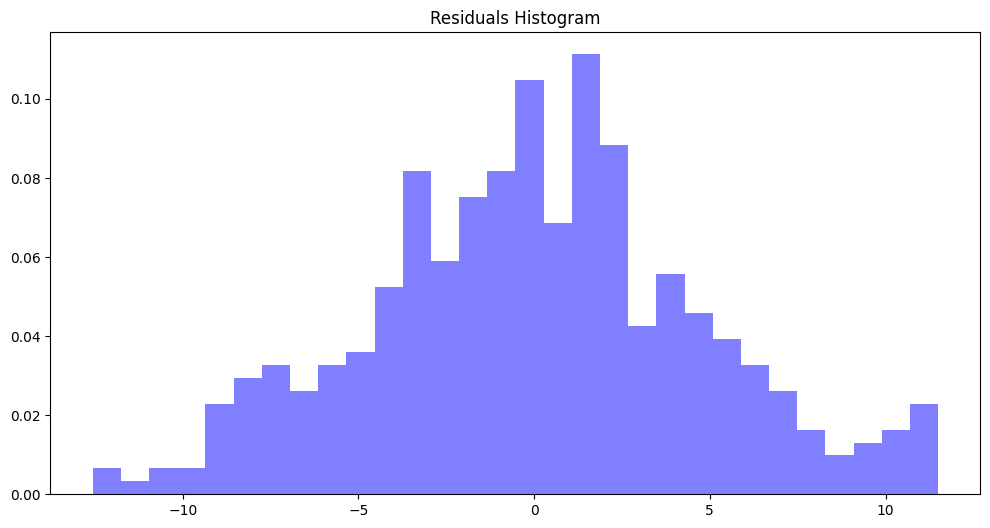

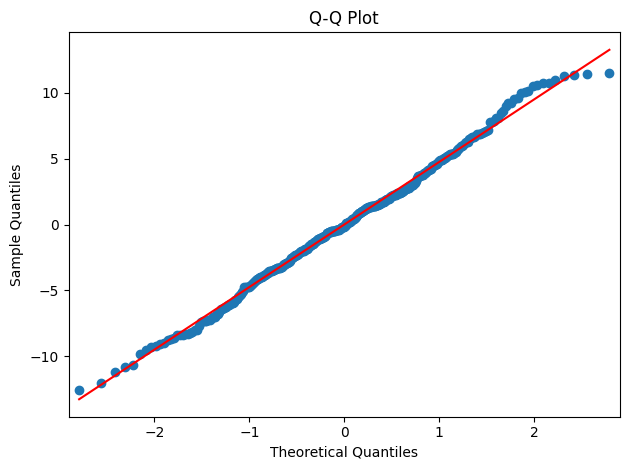

Shapiro-Wilk Test - p-value: 0.20622201263904572
The residuals appear to be normally distributed (fail to reject H0).


In [24]:
residuals_reduced = model_3.resid

plt.figure(figsize=(12, 6))
plt.hist(residuals_reduced, bins=30, density=True, alpha=0.5, color='b')
plt.title('Residuals Histogram')

sm.qqplot(residuals_reduced, line='s', color='r')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

stat, p_value = shapiro(residuals_reduced)
print(f'Shapiro-Wilk Test - p-value: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("The residuals appear to be normally distributed (fail to reject H0).")
else:
    print("The residuals do not appear to be normally distributed (reject H0).")

### Compare the results of your regression to the results of the univariate regression you previously performed. If there is an improvement in the key metrics, is the increased complexity justified? Which metric would you use to justify this?

- Which metric would you use to justify this?
We will be using sm.summary metric which includes all the statistical data related to that model, through which we could compare R squared, Adj. R squared etc.

- Univariate Regression for 'time_on_the_job'
<!-- Regression Summary for 'time_on_the_job':
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.20e-21
Time:                        12:27:27   Log-Likelihood:                 523.55
No. Observations:                 381   AIC:                            -1043.
Df Residuals:                     379   BIC:                            -1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7254      0.005    133.799      0.000       0.715       0.736
time_on_the_job     0.0018      0.000     10.172      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.534   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                          -0.639   Prob(JB):                     1.91e-06
Kurtosis:                       3.166   Cond. No.                         54.0
============================================================================== -->

In [25]:
''' 
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.20e-21
Time:                        12:27:27   Log-Likelihood:                 523.55
No. Observations:                 381   AIC:                            -1043.
Df Residuals:                     379   BIC:                            -1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7254      0.005    133.799      0.000       0.715       0.736
time_on_the_job     0.0018      0.000     10.172      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.534   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                          -0.639   Prob(JB):                     1.91e-06
Kurtosis:                       3.166   Cond. No.                         54.0
==============================================================================
'''

' \n                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                overall   R-squared:                       0.214\nModel:                            OLS   Adj. R-squared:                  0.212\nMethod:                 Least Squares   F-statistic:                     103.5\nDate:                Fri, 02 Feb 2024   Prob (F-statistic):           1.20e-21\nTime:                        12:27:27   Log-Likelihood:                 523.55\nNo. Observations:                 381   AIC:                            -1043.\nDf Residuals:                     379   BIC:                            -1035.\nDf Model:                           1                                         \nCovariance Type:            nonrobust                                         \n===================================================================================\n                      coef    s

Multivariate Regression for 'time_on_the_job'

In [26]:
'''
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        time_on_the_job   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     455.9
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          3.96e-207
Time:                        13:41:43   Log-Likelihood:                -1134.0
No. Observations:                 381   AIC:                             2292.
Df Residuals:                     369   BIC:                             2339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -11.7042      1.955     -5.987      0.000     -15.549      -7.860
tenure_id                         7.8649      0.390     20.184      0.000       7.099       8.631
seniority                        -0.6600      0.334     -1.978      0.049      -1.316      -0.004
alignment                         9.2247      3.782      2.439      0.015       1.788      16.661
development                       8.6727      3.231      2.684      0.008       2.320      15.026
overall                          18.1593      5.005      3.628      0.000       8.317      28.001
location_Austin, TX               5.3805      2.526      2.130      0.034       0.414      10.347
location_Chicago, IL              3.3945      1.686      2.013      0.045       0.078       6.711
sex_F                            -5.4023      0.986     -5.478      0.000      -7.342      -3.463
sex_M                            -6.3019      1.036     -6.082      0.000      -8.339      -4.264
employment_status_Full time      -6.2802      1.082     -5.804      0.000      -8.408      -4.152
employment_status_Part time      -5.4241      1.012     -5.361      0.000      -7.414      -3.435
tenure_2 to less than 4 years     9.2226      0.886     10.415      0.000       7.481      10.964
tenure_4 to less than 6 years    20.8964      1.452     14.396      0.000      18.042      23.751
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.536
Skew:                           0.051   Prob(JB):                        0.765
Kurtosis:                       2.847   Cond. No.                     3.40e+16
==============================================================================
'''

'\n                            OLS Regression Results                            \n==============================================================================\nDep. Variable:        time_on_the_job   R-squared:                       0.931\nModel:                            OLS   Adj. R-squared:                  0.929\nMethod:                 Least Squares   F-statistic:                     455.9\nDate:                Mon, 05 Feb 2024   Prob (F-statistic):          3.96e-207\nTime:                        13:41:43   Log-Likelihood:                -1134.0\nNo. Observations:                 381   AIC:                             2292.\nDf Residuals:                     369   BIC:                             2339.\nDf Model:                          11                                         \nCovariance Type:            nonrobust                                         \n=================================================================================================\n                  

**Univariate Regression for 'time_on_the_job':**
- R-squared: 0.214
- Adjusted R-squared: 0.212
- F-statistic: 103.5

**Multivariate Regression for 'time_on_the_job':**
- R-squared: 0.931
- Adjusted R-squared: 0.929
- F-statistic: 455.9

Comparison:

1. **R-squared and Adjusted R-squared:**
   - The multivariate model (0.931) has a significantly higher R-squared compared to the univariate model (0.214), indicating that the multivariate model explains a larger proportion of the variance in 'time_on_the_job.'

2. **F-statistic:**
   - The F-statistic for the multivariate model (455.9) is substantially higher than that of the univariate model (103.5). This suggests that the inclusion of additional variables in the multivariate model significantly improves its overall explanatory power.

**Conclusion:**
The multivariate model shows a substantial improvement in key metrics (higher R-squared and F-statistic), indicating that the increased complexity is justified. The metrics used to justify this improvement are primarily R-squared and F-statistic. The higher R-squared indicates a better fit, and the higher F-statistic suggests that the multivariate model as a whole is more statistically significant.

The decision to choose the multivariate model over the univariate model is supported by the substantial improvement in explanatory power.

<!-- Univariate Regression Summary for 'time_on_the_job':
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.20e-21
Time:                        12:27:27   Log-Likelihood:                 523.55
No. Observations:                 381   AIC:                            -1043.
Df Residuals:                     379   BIC:                            -1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7254      0.005    133.799      0.000       0.715       0.736
time_on_the_job     0.0018      0.000     10.172      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.534   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                          -0.639   Prob(JB):                     1.91e-06
Kurtosis:                       3.166   Cond. No.                         54.0
============================================================================== -->

### Conclusions

- If you had unlimited programming skills, determine the additional regressors that you would create from the availabe data why?
1. Interaction Terms
2. Polynomial Features
3. Derived Ratios
4. Binning or Categorization
5. Temporal Features
6. Interaction with Time
7. Dimensionality Reduction
8. Feature Scaling
9. Text Mining
10. External Data Integration

- Interpreting the regression results offers valuable insights for informed business decisions.
- Key predictors, including tenure, seniority, overall performance, location, and gender, significantly influence the time employees spend on the job. Positive or negative coefficients indicate the direction and magnitude of these effects. Understanding these relationships allows tailored strategies, such as employee development programs or location-specific initiatives, addressing potential disparities and optimizing workforce management. 
Interpreting the regression results offers valuable insights for informed business decisions. Key predictors, including tenure, seniority, overall performance, location, and gender, significantly influence the time employees spend on the job. Positive or negative coefficients indicate the direction and magnitude of these effects. Understanding these relationships allows tailored strategies, such as employee development programs or location-specific initiatives, addressing potential disparities and optimizing workforce management. 